In [1]:
import pandas as pd

import numpy as np


In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df=pd.read_csv("data/sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
df=df[["text","sentiment","sentiment_confidence"]]
df.head()

,text,sentiment,sentiment_confidence
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045


In [5]:
df["sentiment"].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

## genral features extraction


In [6]:
sent_map={"Negative":-1,"Neutral":0,"Positive":1}

In [7]:
sent_map["Neutral"]

0

In [8]:
df["sentiment_val"]=df["sentiment"].map(sent_map)

In [9]:
df.head()

,text,sentiment,sentiment_confidence,sentiment_val
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,1


In [10]:
df["sentiment_val"].value_counts()

-1    8493
 0    3142
 1    2236
Name: sentiment_val, dtype: int64

###  word count

In [11]:
### word count
text="akash kumar yadav"
print("word_count ",len(text.split()))
print("char_count  ",len(text))

word_count  3
char_count   17


In [12]:
df["text"][0].split()

['RT',
 '@NancyLeeGrahn:',
 'How',
 'did',
 'everyone',
 'feel',
 'about',
 'the',
 'Climate',
 'Change',
 'question',
 'last',
 'night?',
 'Exactly.',
 '#GOPDebate']

In [13]:
df["word_count"]=df["text"].apply(lambda x: len(str(x).split()))

In [14]:
df.head(1)

,text,sentiment,sentiment_confidence,sentiment_val,word_count
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,0,15


### avg_word_len

In [15]:
def avg_word_len(x):
    words=x.split()
    word_len=0
    
    for word in words:
        word_len+=len(word)
    return word_len/len(words)


In [16]:
df["avg_word_len"]=df["text"].apply(lambda x: avg_word_len(x))
df.head()

,text,sentiment,sentiment_confidence,sentiment_val,word_count,avg_word_len
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,0,15,6.133333
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,1,21,5.714286
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,0,15,4.666667
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,1,25,4.640000
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,1,17,7.294118


### stop word

In [17]:
st=set(STOP_WORDS)
st

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [18]:
def stopword_count(x):
    words=x.split()
    count=0
    for word in words:
        if word in st:
            count+=1
    return count


In [19]:
df["stopword_count"]=df["text"].apply(lambda x: stopword_count(x))
df.head()

,text,sentiment,sentiment_confidence,sentiment_val,word_count,avg_word_len,stopword_count
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,0,15,6.133333,5
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,1,21,5.714286,7
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,0,15,4.666667,5
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,1,25,4.640000,8
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,1,17,7.294118,4


In [20]:
df["text"][0]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

### count #hashtag and @something

In [21]:
df["count # and @"]=df["text"].apply(lambda x: len([word for word in x.split() if word.startswith("#")])+len([word for word in x.split() if word.startswith("#")]))
df.head()

,text,sentiment,sentiment_confidence,sentiment_val,word_count,avg_word_len,stopword_count,count # and @
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0.6578,0,15,6.133333,5,2
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,0.6333,1,21,5.714286,7,4
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,0.6629,0,15,4.666667,5,2
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,1.0000,1,25,4.640000,8,2
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,0.7045,1,17,7.294118,4,4


### if numeric digit is present

In [22]:
## use x.isdigit()

## preprocessing and cleaning

### lower case conversion

In [23]:
df["text"][0]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [24]:
df["text"]=df["text"].apply(lambda x:x.lower())

In [25]:
df["text"][0]

'rt @nancyleegrahn: how did everyone feel about the climate change question last night? exactly. #gopdebate'

### contraction to expansion


In [26]:
contraction = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [27]:
def cont_to_exp(x):
    words=x.split()
    for word in words :
        if word in contraction:
            value=contraction[word]
            x=x.replace(word,value)
    return x

In [28]:
%%time
df["text"]=df["text"].apply(lambda x:cont_to_exp(x))

Wall time: 177 ms


### remove email

In [29]:
import re

In [30]:
df["text"]=df["text"].apply(lambda x: re.sub(r'([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','',x))

In [31]:
df["text"][100]

'rt @akbarjenkins: maybe the gop just got piven &amp; cloward confused with pinkard &amp; bowden? "she thinks i steal cars..." @kevinbaker @kevinmkr…'

###  find url and remove url

In [32]:
#re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',x)

In [33]:
df["email_found"]=df["text"].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',x))

In [34]:
df["email_count"]=df["email_found"].apply(lambda x:len(x))

In [35]:
df[df["email_count"]>0].head()

,text,sentiment,sentiment_confidence,sentiment_val,word_count,avg_word_len,stopword_count,count # and @,email_found,email_count
1,rt @scottwalker: did not catch the full #gopde...,Positive,0.6333,1,21,5.714286,7,4,[http://t.co/zsff],1
4,rt @danscavino: #gopdebate w/ @realdonaldtrump...,Positive,0.7045,1,17,7.294118,4,4,[http://t.co],1
9,rt @nancyosborne180: last night's debate prove...,Negative,0.6778,-1,12,9.000000,0,6,[https://t.co/g2ggjy1bjd],1
11,rt @waynedupreeshow: just woke up to tweet thi...,Positive,1.0000,1,18,6.222222,7,2,[http://t.co/6ov5hxhicv],1
12,me reading my family's comments about how grea...,Negative,0.6957,-1,12,6.500000,5,2,[http://t.co/giagjpygxz],1


In [36]:
df["text"][1]

"rt @scottwalker: did not catch the full #gopdebate last night. here are some of scott's best lines in 90 seconds. #walker16 http://t.co/zsff…"

In [37]:
df["text"]=df["text"].apply(lambda x:re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x))

In [38]:
df["text"][1]

"rt @scottwalker: did not catch the full #gopdebate last night. here are some of scott's best lines in 90 seconds. #walker16 …"

### remove RT()

In [39]:
df["text"]=df["text"].apply(lambda x: re.sub('rt','',x))

### removal of special char and punctuation

In [40]:
df["text"][1]

" @scottwalker: did not catch the full #gopdebate last night. here are some of scott's best lines in 90 seconds. #walker16 …"

In [41]:
df["text"]=df["text"].apply(lambda x: re.sub("[^A-Z a-z 0-9-]+",' ',x))

In [42]:
df["text"][1]

'  scottwalker  did not catch the full  gopdebate last night  here are some of scott s best lines in 90 seconds   walker16  '

### remove spaces '      '

In [43]:
x="I am    just try    to remove    extra spaces in this lines "
' '.join(x.split())

'I am just try to remove extra spaces in this lines'

In [44]:
df["text"]=df["text"].apply(lambda x: ' '.join(x.split()))

In [45]:
df["text"][1]

'scottwalker did not catch the full gopdebate last night here are some of scott s best lines in 90 seconds walker16'

### remove html tag

In [46]:
from bs4 import BeautifulSoup as bs

In [47]:
x=" jhgk kjhkh gxf <html><h2>i am very happy</h2></html>"

In [48]:
bs(x,'lxml').get_text()

'jhgk kjhkh gxf i am very happy'

In [49]:
df["text"]=df["text"].apply(lambda x: bs(x,'lxml').get_text())

### Accented Characters 

In [50]:
import unicodedata
txt= u'Málaga'

In [51]:
def fun(x):
    return unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
fun(txt)

'Malaga'

### spacy and nlp

### remove stopwords

In [52]:
import spacy

In [53]:
df["text"][1]

'scottwalker did not catch the full gopdebate last night here are some of scott s best lines in 90 seconds walker16'

In [54]:
df["text"]=df["text"].apply(lambda x: ' '.join([t for t in x.split() if t not in st]))

In [55]:
df["text"][1]

'scottwalker catch gopdebate night scott s best lines 90 seconds walker16'

### lemmnization

In [56]:
nlp=spacy.load("en_core_web_sm")

In [57]:
text="I am playing as well eating"

In [58]:
def ret_to_base(x):
    doc=nlp(x)
    x_list=[]
    
    for token in doc:
        lemma=str(token.lemma_)
        if lemma =="-PRON-" or lemma=="be":
            lemma=token.text
            
        x_list.append(lemma)
        
    return (" ".join(x_list))

In [59]:
ret_to_base(text)

'I am play as well eat'

In [60]:
df["text"][1]

'scottwalker catch gopdebate night scott s best lines 90 seconds walker16'

In [61]:
df["text"]=df["text"].apply(lambda x:ret_to_base(x))

In [62]:
df["text"][1]

'scottwalker catch gopdebate night scott s good line 90 second walker16'

### common word remove

In [63]:
text=' '.join(df["text"])


In [64]:
text=text.split()

In [65]:
text_freq=pd.Series(text).value_counts()

In [66]:
top10=text_freq[:10]
top10

gopdebate          14106
rwsurfergirl        1975
trump               1910
s                   1578
fox                 1337
debate              1225
candidate           1163
-                   1162
realdonaldtrump     1082
amp                 1060
dtype: int64

In [67]:
df["text"][1]

'scottwalker catch gopdebate night scott s good line 90 second walker16'

In [68]:
df["text"]=df["text"].apply(lambda x:' '.join([t for t in x.split() if t not in top10]))
df["text"][1]

'scottwalker catch night scott good line 90 second walker16'

### rare word removal

In [69]:
last=text_freq[text_freq==1]
last

downfal          1
enact            1
truer            1
68w              1
responsibly      1
                ..
korystamper      1
atm              1
tramp            1
ninjaeconomic    1
ullikemike       1
Length: 7584, dtype: int64

In [70]:
df["text"]=df["text"].apply(lambda x:' '.join([t for t in x.split() if t not in last]))
df["text"][1]

'scottwalker catch night scott good line 90 second walker16'

### word cloud visualization

In [71]:
#!pip install wordcloud

In [72]:
text=" ".join(df["text"])

In [73]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
%matplotlib inline

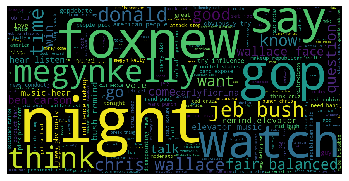

In [74]:
wc=WordCloud(width=1200,height=600).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

### spelling correction

In [75]:
from textblob import TextBlob as tb

In [76]:
x="I leke to pleying crickket but not foitball"

In [77]:
x=tb(x).correct()

In [78]:
x

TextBlob("I like to playing cricket but not football")

In [79]:
df["text"][0]

'nancyleegrahn feel climate change question night exactly'

In [80]:
tb(df["text"][0]).correct()

TextBlob("nancyleegrahn feel climate change question night exactly")

### tokenization

In [81]:
x="Akash#kumar yadav is a student,and boy"

In [82]:
tb(x).words

WordList(['Akash', 'kumar', 'yadav', 'is', 'a', 'student', 'and', 'boy'])

In [83]:
doc=nlp(x)
for token in doc:
    print(token)

Akash#kumar
yadav
is
a
student
,
and
boy


### lemmatization

In [84]:
x="plays playing play played"

In [85]:
from textblob import Word

In [86]:
for token in x.split():
    print(Word(token).lemmatize())

play
playing
play
played


In [87]:
doc=nlp(x)
for token in doc:
    print(token.lemma_)

play
play
play
play


### detect entity using NER in SpaCy

In [88]:
x="Indian Prime minister  modi going to meet US  President Donald Trump."

In [89]:
doc=nlp(x)

for ent in doc.ents:
    print(ent.text,"  ---   ",ent.label_,"  ------ ",str(spacy.explain(ent.label_)))

Indian   ---    NORP   ------  Nationalities or religious or political groups
US   ---    GPE   ------  Countries, cities, states
Donald Trump   ---    PERSON   ------  People, including fictional


In [90]:
from spacy import displacy

In [91]:
displacy.render(doc,style="ent")

### detecting noun


In [92]:
for noun in doc.noun_chunks:
    print(noun)

Indian Prime minister  modi
US  President Donald Trump


### translation and language detection

In [93]:
### using textblob for translation

In [94]:
x=tb(x)

In [95]:
x.detect_language()

'en'

In [96]:
x.translate(to="hi")

TextBlob("अमेरिकी राष्ट्रपति डोनाल्ड ट्रंप से मिलने जा रहे भारतीय प्रधानमंत्री मोदी")

In [97]:
x.translate(to="gu")

TextBlob("ભારતીય વડા પ્રધાન મોદી મોદીના રાષ્ટ્રપતિ ડોનાલ્ડ ટ્રમ્પને મળવા જઇ રહ્યા છે.")

### use inbuit textblob sentiment classifier

In [98]:
from textblob.sentiments import NaiveBayesAnalyzer

In [99]:
text1="World has suffered alot due to corona virus."
text2="whenever people came together to form unity ,they can defeat any enemy."

In [100]:
x=tb(text1,analyzer=NaiveBayesAnalyzer())
y=tb(text2,analyzer=NaiveBayesAnalyzer())

In [101]:
print(x.sentiment)
print(y.sentiment)

Sentiment(classification='pos', p_pos=0.9186920664575828, p_neg=0.08130793354241578)
Sentiment(classification='pos', p_pos=0.6656682335274067, p_neg=0.33433176647259183)


In [102]:
### we can see error that why we should build our own classifier

### Advance Text Processing


### N gram

In [103]:
text="Hey bro myself Akash yadav"

In [104]:
x=tb(text)

In [105]:
x.ngrams(2)

[WordList(['Hey', 'bro']),
 WordList(['bro', 'myself']),
 WordList(['myself', 'Akash']),
 WordList(['Akash', 'yadav'])]

### Bag of words

In [106]:
text_list=["this is first sentences","and this is second","at last this is third"]

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
cv=CountVectorizer(ngram_range=(1, 1))
x=cv.fit_transform(text_list)


In [109]:
bag=pd.DataFrame(x.todense(),columns=cv.get_feature_names())
bag

,and,at,first,is,last,second,sentences,third,this
0,0,0,1,1,0,0,1,0,1
1,1,0,0,1,0,1,0,0,1
2,0,1,0,1,1,0,0,1,1


### TF-IDF

#### Termfrequency  (TF)

In [110]:
### its is just normalization of bag of words

In [111]:
tf=bag.copy()

In [112]:
for index , row in enumerate(tf.iterrows()): 
     for col in row[1].index:
            tf.loc[index,col]=tf.loc[index,col]/sum(row[1].values)

In [113]:
tf

,and,at,first,is,last,second,sentences,third,this
0,0.00,0.0,0.25,0.25,0.0,0.00,0.25,0.0,0.25
1,0.25,0.0,0.00,0.25,0.0,0.25,0.00,0.0,0.25
2,0.00,0.2,0.00,0.20,0.2,0.00,0.00,0.2,0.20


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(text_list)

In [116]:
pd.DataFrame(x.todense(),columns=tfidf.get_feature_names())

,and,at,first,is,last,second,sentences,third,this
0,0.000000,0.00000,0.608845,0.359594,0.00000,0.000000,0.608845,0.00000,0.359594
1,0.608845,0.00000,0.000000,0.359594,0.00000,0.608845,0.000000,0.00000,0.359594
2,0.000000,0.52004,0.000000,0.307144,0.52004,0.000000,0.000000,0.52004,0.307144


### word embedding

#### another way to extract feature  (SpaCy word2Vect)

In [117]:
 #!python -m spacy download en_core_web_lg

In [118]:
nlp=spacy.load("en_core_web_lg")

In [153]:
doc=nlp("hey man ,i like dog ,mouse as well lion")

In [154]:
for token in doc:
    print(token.text,token.has_vector)

hey True
man True
, True
i True
like True
dog True
, True
mouse True
as True
well True
lion True


In [155]:
token.vector.shape

(300,)

In [156]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,"   ",token2.text,"------>",token1.similarity(token2))

hey     hey ------> 1.0
hey     man ------> 0.4575654
hey     , ------> 0.22317766
hey     i ------> 0.66120166
hey     like ------> 0.5272559
hey     dog ------> 0.2888919
hey     , ------> 0.22317766
hey     mouse ------> 0.21399915
hey     as ------> 0.23906006
hey     well ------> 0.43410397
hey     lion ------> 0.2407
man     hey ------> 0.4575654
man     man ------> 1.0
man     , ------> 0.25948188
man     i ------> 0.40693417
man     like ------> 0.49120727
man     dog ------> 0.41745955
man     , ------> 0.25948188
man     mouse ------> 0.19200066
man     as ------> 0.4558955
man     well ------> 0.44000217
man     lion ------> 0.38981822
,     hey ------> 0.22317766
,     man ------> 0.25948188
,     , ------> 1.0
,     i ------> 0.20209649
,     like ------> 0.3878133
,     dog ------> 0.15099345
,     , ------> 1.0
,     mouse ------> 0.123743504
,     as ------> 0.45343965
,     well ------> 0.44174522
,     lion ------> 0.094719
i     hey ------> 0.66120166
i     man -----

### Mchine leaning model for Text Classfication

### BOW

In [122]:
df["sentiment"].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [123]:
df0=df[df["sentiment_val"]==0].sample(2200)
df1=df[df["sentiment_val"]==1].sample(2200)
df2=df[df["sentiment_val"]==-1].sample(2200)

In [124]:
df_new=df0.append(df1)

In [125]:
df_new.shape

(4400, 10)

In [126]:
from random import shuffle

In [127]:
#shuffle(df_new)

In [128]:
df_new=df_new.append(df2)

In [129]:
df_new.shape

(6600, 10)

In [130]:
df_new=df_new.reset_index(drop=True)
df_new.head()

,text,sentiment,sentiment_confidence,sentiment_val,word_count,avg_word_len,stopword_count,count # and @,email_found,email_count
0,megynkelly pose adult picture bring,Neutral,0.6512,0,14,6.571429,3,4,[],0
1,sky news youtube,Neutral,1.0000,0,5,5.600000,1,2,[],0
2,give politician system broken tell work say wrong,Neutral,0.3598,0,23,4.478261,12,2,[],0
3,abcpolitics accord gov most retweete tweet com...,Neutral,0.6559,0,20,6.050000,6,2,[],0
4,bgittleson icymi crowd field embody photo,Neutral,0.6629,0,14,6.785714,4,2,[https://t.co/r2akyirxib],1


In [131]:
df_manual_feat=df_new[["word_count","avg_word_len","stopword_count","count # and @","email_count"]]
df_manual_feat

,word_count,avg_word_len,stopword_count,count # and @,email_count
0,14,6.571429,3,4,0
1,5,5.600000,1,2,0
2,23,4.478261,12,2,0
3,20,6.050000,6,2,0
4,14,6.785714,4,2,1
...,...,...,...,...,...
6595,10,5.200000,4,2,0
6596,22,5.545455,5,0,0
6597,14,8.500000,4,6,1
6598,19,5.210526,7,4,0


In [132]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
text_count=cv.fit_transform(df_new["text"])


In [133]:
text_count.toarray().shape

(6600, 5271)

In [134]:
df_bag=pd.DataFrame(text_count.todense(),columns=cv.get_feature_names())
df_bag.head()

,00,000,10,100,1000s,1012000,10k,11,11000,11am,...,zeitgeistghost,zellieimani,zero,zigzagoonsquad,zinger,zingers,zoe,zombie,zonkerpa,zoomph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
y=df_new["sentiment_val"]
y.shape

(6600,)

In [136]:
df_bag.shape

(6600, 5271)

### ML Algorithm

In [137]:
from sklearn.linear_model import SGDClassifier,LogisticRegression,LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [139]:
sgd=SGDClassifier(max_iter=200,n_jobs=-1,random_state=42)
lgr=LogisticRegression(max_iter=200,random_state=42)
#lgcv=LogisticRegressionCV(cv=3,random_state=42,max_iter=1000)
svm=LinearSVC(random_state=42,max_iter=200)
rfc=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200)

In [140]:
clf={"SGD":sgd,"LGR":lgr,"SVM":svm,"RFC":rfc}

In [141]:
clf.keys()

dict_keys(['SGD', 'LGR', 'SVM', 'RFC'])

In [142]:
def training(X,y):
    scaler=MinMaxScaler(feature_range=(0, 1))
    X=scaler.fit_transform(X)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=.2,random_state=42)
    
    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred=clf[key].predict(X_test)
        ac=accuracy_score(y_test,y_pred)
        print(key,"------->",ac)

In [143]:
%%time
training(df_bag,y)

SGD -------> 0.5954545454545455
LGR -------> 0.5962121212121212


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM -------> 0.5848484848484848
RFC -------> 0.581060606060606
Wall time: 1min 10s


### try BOw +manual feat

In [144]:
df_combine=df_bag.join(df_manual_feat)
df_combine.head()

,00,000,10,100,1000s,1012000,10k,11,11000,11am,...,zingers,zoe,zombie,zonkerpa,zoomph,word_count,avg_word_len,stopword_count,count # and @,email_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14,6.571429,3,4,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,5.600000,1,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,23,4.478261,12,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,6.050000,6,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14,6.785714,4,2,1


In [145]:
%%time
training(df_combine,y)

SGD -------> 0.5946969696969697
LGR -------> 0.6121212121212121


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM -------> 0.5901515151515152
RFC -------> 0.5871212121212122
Wall time: 55.4 s


### using TFIDF

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
tfidf=TfidfVectorizer()

In [148]:
X=tfidf.fit_transform(df_new["text"])

In [149]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
%%time 
training(pd.DataFrame(X.toarray()),y)

SGD -------> 0.5818181818181818
LGR -------> 0.6007575757575757
SVM -------> 0.5765151515151515
RFC -------> 0.5833333333333334
Wall time: 1min 20s


### Using Word2vect

In [157]:
def get_vect(x):
    doc=nlp(x)
    return doc.vector.reshape(1,-1)

In [159]:
df_new["vector"]=df_new["text"].apply(lambda x:get_vect(x))

In [170]:
X=np.concatenate(df_new["vector"].to_numpy(),axis=0)
X.shape

(6600, 300)

(1, 300)

In [172]:
training(pd.DataFrame(X),y)

SGD -------> 0.5401515151515152


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LGR -------> 0.5621212121212121


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM -------> 0.5659090909090909
RFC -------> 0.5909090909090909


In [174]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred=clf[key].predict(get_vect(x))
        print(key,"---->",y_pred)

In [177]:
predict_w2v("happy nice excelllent")

SGD ----> [1]
LGR ----> [1]
SVM ----> [1]
RFC ----> [0]
